In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df_original = pd.read_csv('Car_Price_Cleaned.csv')

In [4]:
df_original = df_original.drop('Unnamed: 0',axis=1)

In [5]:
df_original.head()

symboling  normalized_losses Fuel_type make num_of_doors   aspiration  \
0          3              115.0       gas  std          two  convertible   
1          3              115.0       gas  std          two  convertible   
2          1              115.0       gas  std          two    hatchback   
3          2              164.0       gas  std         four        sedan   
4          2              164.0       gas  std         four        sedan   

  wheel_base engine_location  drive_wheels   body_style  ...  engine_size  \
0        rwd           front          88.6  alfa-romero  ...          130   
1        rwd           front          88.6  alfa-romero  ...          130   
2        rwd           front          94.5  alfa-romero  ...          152   
3        fwd           front          99.8         audi  ...          109   
4        4wd           front          99.4         audi  ...          136   

   fuel_system  bore  stroke compression_ratio horsepower  peak_rpm city_mpg  \
0         mpfi  3.47    2.68               9.0      111.0    5000.0       21   
1         mpfi  3.47    2.68               9.0      111.0    5000.0       21   
2         mpfi  2.68    3.47               9.0      154.0    5000.0       19   
3         mpfi  3.19    3.40              10.0      102.0    5500.0       24   
4         mpfi  3.19    3.40               8.0      115.0    5500.0       18   

   highway_mpg  price  
0           27  13495  
1           27  16500  
2           26  16500  
3           30  13950  
4           22  17450  

[5 rows x 26 columns]

In [6]:
df = pd.read_csv('Car_Price_Cleaned&Encoded.csv')
df = df.drop('Unnamed: 0',axis=1)

In [7]:
df.head()

symboling  normalized_losses  drive_wheels  length  width  height  \
0          3              115.0          88.6   168.8   64.1    48.8   
1          3              115.0          88.6   168.8   64.1    48.8   
2          1              115.0          94.5   171.2   65.5    52.4   
3          2              164.0          99.8   176.6   66.2    54.3   
4          2              164.0          99.4   176.6   66.4    54.3   

   curb_weight  engine_size  bore  stroke  ...  num_of_cylinders_twelve  \
0         2548          130  3.47    2.68  ...                        0   
1         2548          130  3.47    2.68  ...                        0   
2         2823          152  2.68    3.47  ...                        0   
3         2337          109  3.19    3.40  ...                        0   
4         2824          136  3.19    3.40  ...                        0   

   num_of_cylinders_two  fuel_system_1bbl  fuel_system_2bbl  fuel_system_4bbl  \
0                     0                 0                 0                 0   
1                     0                 0                 0                 0   
2                     0                 0                 0                 0   
3                     0                 0                 0                 0   
4                     0                 0                 0                 0   

   fuel_system_idi  fuel_system_mfi  fuel_system_mpfi  fuel_system_spdi  \
0                0                0                 1                 0   
1                0                0                 1                 0   
2                0                0                 1                 0   
3                0                0                 1                 0   
4                0                0                 1                 0   

   fuel_system_spfi  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0  

[5 rows x 75 columns]

## LINEAR REGRESSION

In [9]:
from sklearn.model_selection import GridSearchCV,train_test_split

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
from sklearn.linear_model import LinearRegression, ElasticNet, Ridge, Lasso

In [12]:
from sklearn.metrics import mean_absolute_percentage_error,root_mean_squared_error, r2_score

In [13]:
def ajr2(te,pe,n,k):
    r = r2_score(te,pe)
    ans = 1 - ((1-r)*(n-1)/(n-k-1))
    return ans

In [14]:
# Splitting the data in (train,test) with 20% in test

In [8]:
X = df.drop('price',axis=1)
y = df['price']

In [16]:
X_tr, X_te, y_tr, y_te = train_test_split(X,y,test_size=0.2,random_state=42)

In [17]:
X_tr.shape

(160, 74)

In [18]:
X_te.shape

(41, 74)

In [19]:
# scaling the data 

In [20]:
scaler = StandardScaler()

In [21]:
scaled_X_tr = scaler.fit_transform(X_tr)
scaled_X_te = scaler.transform(X_te)

In [22]:
scaled_X_tr

array([[-1.43486011, -0.76987624,  1.75388872, ...,  1.06458129,
        -0.19738551, -0.07930516],
       [-0.61494005, -1.07705878, -0.38295763, ..., -0.93933644,
        -0.19738551, -0.07930516],
       [ 0.20498002,  0.85819122, -0.85781238, ..., -0.93933644,
        -0.19738551, -0.07930516],
       ...,
       [ 0.20498002,  0.24382614, -0.72213959, ..., -0.93933644,
        -0.19738551, -0.07930516],
       [ 1.02490008,  0.05951662, -0.24728485, ...,  1.06458129,
        -0.19738551, -0.07930516],
       [ 1.84482014,  2.2712309 , -1.26483073, ...,  1.06458129,
        -0.19738551, -0.07930516]])

In [22]:
linear = LinearRegression()

In [23]:
linear.fit(scaled_X_tr,y_tr)

LinearRegression()

In [24]:
linear.coef_

array([-1.58748916e+02, -1.48351690e+02,  1.15063761e+03, -1.30537658e+03,
        1.03817949e+03, -6.47579553e+02,  3.28517286e+03,  7.79001202e+02,
       -4.76225511e+02, -1.67342060e+02, -2.48414833e+03, -1.14247169e+02,
        4.69535651e+02, -4.64618932e+02,  7.53943691e+02,  7.75325858e+02,
       -7.75325858e+02, -3.13340575e+02,  3.13340575e+02,  1.67615290e+02,
       -1.67615290e+02,  5.02228927e+02,  5.94009323e+01, -4.19979327e+01,
        1.55821443e+01, -2.16053194e+02, -2.59737734e+02, -4.59118058e+02,
        5.78575286e+02, -4.18565973e+02,  4.18565973e+02,  9.15496735e+01,
        8.27867443e+02,  1.14700996e+03, -2.15742268e+02, -5.77119679e+02,
        2.19413990e+02, -3.70579075e+02,  4.61934921e+02,  6.26115984e+01,
        3.98543449e+02, -1.14634538e+02, -4.01096063e+02,  8.30548992e+00,
       -4.69988523e+02, -4.67020169e+02,  7.23099531e+02, -9.12301171e+01,
        5.65327738e+02, -5.24074121e+01, -5.78716610e+02,  3.87336215e+01,
       -3.55988733e+01,  

In [25]:
pr_linear = linear.predict(scaled_X_te)

In [26]:
pr_linear

array([ 7308.55241312, 28075.10791204,  6615.92075228,  7462.51243955,
       12922.40662186,  5563.09300214, 43465.08667039,  9672.07359852,
       16330.43450812, 32386.71314624, 25099.6728747 , 10367.40895844,
       10585.66753558,  8137.10290648, 12274.32035536,  8315.34146815,
       10111.77108224,  7206.14462911,  9063.96223641, 42373.46529515,
       32528.        , 31230.33542191,  6799.24938433,  6987.66501887,
       25898.1943257 , 10231.42709669, 10992.90279239, 27856.69673021,
       35659.15433275, 15332.45628892, 18227.25117972,  5641.42010096,
       13039.65107518,  6767.3350205 ,  5080.9240876 , 13781.57132337,
        6491.33527347,  8108.36919003, 10955.3104099 ,  8627.16208333,
       12878.85825846])

In [27]:
mean_absolute_percentage_error(y_te,pr_linear)

0.1135110745901699

In [28]:
root_mean_squared_error(y_te,pr_linear)

3274.6247291939376

In [29]:
r2_score(y_te,pr_linear)

0.9123543118721967

In [30]:
ridge = Ridge()

In [31]:
ridge.fit(scaled_X_tr,y_tr)

Ridge()

In [32]:
ridge.coef_

array([-126.71559639,  -90.21379867,  901.03143725, -820.03955697,
        979.72017162, -460.61214825, 2361.21457025,  817.41444121,
       -337.70470085, -233.0791413 , -682.24516715,  414.372084  ,
        344.30153855, -476.63690909,  610.97524085,  248.86085621,
       -248.86085621, -332.12993286,  332.12993286,  170.88416846,
       -170.88416846,  537.70198133,  -11.63284915,  -12.0586487 ,
        -14.51916084, -197.32884902, -156.44290049, -461.76610234,
        537.48603858, -397.65826383,  397.65826383,   76.66332221,
        653.39332036, 1072.64106942, -177.37039119, -470.33975704,
        246.42677662, -337.34084875,  665.34340243,   82.23628736,
        373.76278711, -154.97782315, -325.04892635,  -61.48247711,
       -353.81300428, -402.82987079,  651.04046891,  -99.78209852,
        448.19276242, -106.45652283, -544.60766194,  -19.87870197,
        -61.10557368,  -54.74029936, -236.65573411,  321.52104854,
         22.01422978, -295.74295806,  -20.67678313, 1660.18596

In [33]:
pr_ridge = ridge.predict(scaled_X_te)

In [34]:
mean_absolute_percentage_error(y_te,pr_ridge)

0.1149769013894905

In [35]:
root_mean_squared_error(y_te,pr_ridge)

3304.51389116341

In [36]:
r2_score(y_te,pr_ridge)

0.9107470366258723

In [37]:
lasso = Lasso()

In [38]:
lasso.fit(scaled_X_tr,y_tr)

Lasso()

In [39]:
lasso.coef_

array([-1.42673742e+02, -1.30534323e+02,  1.09742704e+03, -1.22634527e+03,
        1.01314381e+03, -6.07014736e+02,  3.16172093e+03,  7.54853921e+02,
       -4.59586056e+02, -1.64939656e+02, -1.88658587e+03,  2.53861172e+01,
        4.30181342e+02, -4.67949511e+02,  7.18210624e+02,  1.73927565e+03,
       -5.77449555e-10, -6.30527644e+02,  2.11329620e-11,  3.32119520e+02,
       -0.00000000e+00,  5.16906147e+02,  4.96524171e+01, -4.24653479e+00,
        4.78333214e+01, -1.88472488e+02, -2.68005953e+02, -5.14960966e+02,
        4.88836839e+02, -8.49051601e+02,  5.05036013e-11,  9.41926288e+01,
        7.73220302e+02,  1.15699481e+03, -1.97918768e+02, -5.39855654e+02,
        2.24209306e+02, -3.48214970e+02,  5.12589425e+02,  9.14318678e+01,
        3.79268496e+02, -1.15708608e+02, -3.76094246e+02,  1.08523539e+01,
       -7.45342332e+02, -4.41879551e+02,  7.10588013e+02, -8.74989868e+01,
        5.38957311e+02, -0.00000000e+00, -5.48653141e+02,  3.08072311e+01,
       -1.44350931e+01,  

In [40]:
pr_lasso = lasso.predict(scaled_X_te)

In [41]:
mean_absolute_percentage_error(y_te,pr_lasso)

0.11367956007385113

In [42]:
root_mean_squared_error(y_te,pr_lasso)

3294.6953173208212

In [43]:
r2_score(y_te,pr_lasso)

0.9112766363961287

In [44]:
elastic = ElasticNet()

In [45]:
elastic.fit(scaled_X_tr,y_tr)

ElasticNet()

In [46]:
elastic.coef_

array([  67.09191708,   97.07727642,  420.27962702,  348.98404555,
        606.35951799,  -24.11344147,  585.80835495,  735.04988115,
        138.89709836,  -95.2750853 ,   44.85886193,  563.36661467,
        -81.89288252, -298.53667346, -252.01492031,   61.3494297 ,
        -61.34231483, -173.12385093,  173.12282768,   57.02496089,
        -57.0185028 ,  282.61723067,   89.71212028,  -64.28101232,
         73.81592431, -184.98876955,  -54.46959367, -330.44365756,
        360.68856004, -326.48939148,  326.48985752,   49.33702738,
        226.34803862,  648.98623731,   40.72425987, -130.65993155,
         49.90527178, -185.93699861,  534.61180358,   17.87181858,
        631.22234596,  -58.3025112 , -104.6851818 , -228.85476722,
       -172.57014993, -141.23624464,  464.87316012, -149.68026301,
        172.70703859, -195.41266625, -382.58070722, -106.57471635,
        120.6818024 ,    3.83436789, -130.24072886,   82.40911342,
        -84.89027684,   77.81599796,  -25.66167258,  900.93066

In [47]:
elastic.l1_ratio

0.5

In [48]:
pr_elastic = elastic.predict(scaled_X_te)

In [49]:
mean_absolute_percentage_error(y_te,pr_elastic)

0.13082509529052197

In [50]:
root_mean_squared_error(y_te,pr_elastic)

3684.4569435896506

In [51]:
r2_score(y_te,pr_elastic)

0.8890430648302339

In [52]:
params = {'alpha': [0.01,.1,1,10]}

In [53]:
ridge_grid = GridSearchCV(ridge,params,cv=5,scoring='neg_root_mean_squared_error')

In [54]:
ridge_grid.fit(scaled_X_tr,y_tr)

GridSearchCV(cv=5, estimator=Ridge(), param_grid={'alpha': [0.01, 0.1, 1, 10]},
             scoring='neg_root_mean_squared_error')

In [55]:
ridge_grid.best_params_

{'alpha': 10}

In [56]:
pr_t_ridge = ridge_grid.predict(scaled_X_te)

In [57]:
mean_absolute_percentage_error(y_te,pr_t_ridge)

0.12085869597989897

In [58]:
root_mean_squared_error(y_te,pr_t_ridge)

3334.296044333244

In [59]:
r2_score(y_te,pr_t_ridge)

0.9091309902898504

In [60]:
params = {'alpha': [.01,.1,1,10,100]}

In [61]:
lasso_grid = GridSearchCV(lasso,params,cv=5,scoring='neg_root_mean_squared_error')

In [62]:
lasso_grid.fit(scaled_X_tr,y_tr)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.01, 0.1, 1, 10, 100]},
             scoring='neg_root_mean_squared_error')

In [63]:
lasso_grid.best_params_

{'alpha': 100}

In [64]:
pr_t_lasso = lasso_grid.predict(scaled_X_te)

In [65]:
mean_absolute_percentage_error(y_te,pr_t_lasso)

0.13060907066312602

In [66]:
root_mean_squared_error(y_te,pr_t_lasso)

3430.4865038505754

In [67]:
r2_score(y_te,pr_t_lasso)

0.9038124393755175

In [68]:
params = {'alpha': [.001,.01,.1,1], 'l1_ratio': [.2,.5,.8]}

In [69]:
elastic_grid = GridSearchCV(ElasticNet(max_iter=5000),params,cv=5,scoring='neg_root_mean_squared_error')

In [70]:
elastic_grid.fit(scaled_X_tr,y_tr)

GridSearchCV(cv=5, estimator=ElasticNet(max_iter=5000),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1],
                         'l1_ratio': [0.2, 0.5, 0.8]},
             scoring='neg_root_mean_squared_error')

In [71]:
elastic_grid.best_params_

{'alpha': 0.1, 'l1_ratio': 0.2}

In [72]:
pr_t_elastic = elastic_grid.predict(scaled_X_te)

In [73]:
mean_absolute_percentage_error(y_te,pr_t_elastic)

0.1219491759033103

In [74]:
root_mean_squared_error(y_te,pr_t_elastic)

3339.9605987203045

In [75]:
r2_score(y_te,pr_t_elastic)

0.9088219777282995

In [76]:
from sklearn.neighbors import KNeighborsRegressor

In [77]:
knn = KNeighborsRegressor()

In [78]:
knn.fit(scaled_X_tr,y_tr)

KNeighborsRegressor()

In [79]:
scaled_X_tr.shape

(160, 74)

In [80]:
pr_knn = knn.predict(scaled_X_te)

In [81]:
mean_absolute_percentage_error(y_te,pr_knn)

0.19288153130035934

In [82]:
root_mean_squared_error(y_te,pr_knn)

6841.655454996112

In [83]:
r2_score(y_te,pr_knn)

0.6174132902284035

In [84]:
params = {
    'n_neighbors': range(1, 31),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

In [85]:
knn_grid = GridSearchCV(knn,params,cv=5,scoring='neg_root_mean_squared_error')

In [86]:
knn_grid.fit(scaled_X_tr,y_tr)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': range(1, 31),
                         'weights': ['uniform', 'distance']},
             scoring='neg_root_mean_squared_error')

In [87]:
knn_grid.best_params_

{'metric': 'manhattan', 'n_neighbors': 2, 'weights': 'distance'}

In [88]:
pr_t_knn = knn_grid.predict(scaled_X_te)

In [89]:
mean_absolute_percentage_error(y_te,pr_t_knn)

0.1343761124502189

In [90]:
root_mean_squared_error(y_te,pr_t_knn)

3652.9127499083206

In [91]:
r2_score(y_te,pr_t_knn)

0.8909348303822914

In [92]:
from sklearn.svm import LinearSVR,SVR

In [93]:
lsvr = LinearSVR()

In [94]:
svr = SVR()

In [95]:
lsvr.fit(scaled_X_tr,y_tr)

LinearSVR()

In [96]:
lsvr.coef_

array([-6.43929354e-15,  4.21884749e-15,  2.15938378e-13, -2.62567745e-13,
        3.04978265e-13, -3.12305737e-13,  2.65343303e-14, -5.55111512e-16,
       -4.38676873e-13,  1.43662859e-13,  4.75175455e-14, -2.10942375e-14,
       -2.13162821e-14,  1.64313008e-14, -1.78745907e-14, -3.10862447e-15,
        7.54951657e-15,  4.39648318e-14,  4.99600361e-15,  2.10942375e-14,
        2.22044605e-15, -2.60902411e-15, -2.60902411e-15,  1.97619698e-14,
        8.88178420e-15, -4.21884749e-15, -1.12687637e-14,  1.44328993e-14,
        1.33226763e-15, -4.13558077e-14,  9.99200722e-16, -4.55191440e-15,
       -7.27196081e-15, -1.32671651e-14,  3.63598041e-15,  5.93969318e-15,
        9.65894031e-15, -9.68669589e-15,  7.21644966e-15,  9.99200722e-16,
       -8.88178420e-16,  7.18869408e-15, -1.30451205e-14, -1.68753900e-14,
       -5.77315973e-15,  9.10382880e-15, -9.65894031e-15,  1.34059430e-14,
        2.84772206e-14, -1.22124533e-15,  1.11022302e-14,  6.10622664e-16,
       -3.99680289e-15,  

In [97]:
pr_lsvr = lsvr.predict(scaled_X_te)

In [98]:
mean_absolute_percentage_error(y_te,pr_lsvr)

0.985142326021506

In [99]:
root_mean_squared_error(y_te,pr_lsvr)

19057.54231844999

In [100]:
r2_score(y_te,pr_lsvr)

-1.9685287978461674

In [101]:
svr.fit(scaled_X_tr,y_tr)

SVR()

In [102]:
pr_svr = svr.predict(scaled_X_te)

In [103]:
mean_absolute_percentage_error(y_te,pr_svr)

0.41165594902329916

In [104]:
root_mean_squared_error(y_te,pr_svr)

12216.11458365787

In [105]:
r2_score(y_te,pr_svr)

-0.21975800228256204

In [106]:
params = [{'kernel': ['linear', 'rbf'],
     'C': [0.1, 1, 10, 100],
     'epsilon': [0.01, 0.1, 0.5, 1],
     'gamma': ['scale', 0.01, 0.1, 1]},

          {'kernel': ['poly'],
     'C': [0.1, 1, 10, 100],
     'epsilon': [0.01, 0.1, 0.5, 1],
     'gamma': ['scale', 0.01, 0.1, 1],
     'degree': [2, 3, 4],
     'coef0': [0, 0.1, 0.5, 1]}
         ]

In [107]:
svr_grid = GridSearchCV(svr,params,cv=5,scoring='neg_mean_squared_error')

In [108]:
svr_grid.fit(scaled_X_tr,y_tr)

GridSearchCV(cv=5, estimator=SVR(),
             param_grid=[{'C': [0.1, 1, 10, 100],
                          'epsilon': [0.01, 0.1, 0.5, 1],
                          'gamma': ['scale', 0.01, 0.1, 1],
                          'kernel': ['linear', 'rbf']},
                         {'C': [0.1, 1, 10, 100], 'coef0': [0, 0.1, 0.5, 1],
                          'degree': [2, 3, 4], 'epsilon': [0.01, 0.1, 0.5, 1],
                          'gamma': ['scale', 0.01, 0.1, 1],
                          'kernel': ['poly']}],
             scoring='neg_mean_squared_error')

In [109]:
svr_grid.best_params_

{'C': 100, 'epsilon': 1, 'gamma': 'scale', 'kernel': 'linear'}

In [110]:
pr_t_svr = svr_grid.predict(scaled_X_te)

In [111]:
mean_absolute_percentage_error(y_te,pr_t_svr)

0.1161202889966565

In [112]:
root_mean_squared_error(y_te,pr_t_svr)

3577.0839149082476

In [113]:
r2_score(y_te,pr_t_svr)

0.8954158821528756

In [126]:
from sklearn.tree import DecisionTreeRegressor, plot_tree

In [127]:
dtr = DecisionTreeRegressor()

In [128]:
dtr.fit(X_tr,y_tr)

DecisionTreeRegressor()

In [129]:
dtr.feature_importances_

array([6.46846603e-06, 9.16562548e-03, 1.25326302e-03, 2.16379130e-03,
       3.28723163e-02, 6.10723011e-03, 5.79760822e-01, 2.94248776e-01,
       9.81501398e-04, 4.94143885e-03, 4.10414997e-03, 1.73366963e-02,
       1.15867858e-08, 6.14706128e-04, 4.02974691e-03, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.24699693e-04,
       1.39825309e-06, 0.00000000e+00, 8.39870571e-06, 9.59754478e-04,
       1.43651909e-03, 5.25741837e-05, 0.00000000e+00, 0.00000000e+00,
       4.21769919e-05, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.69868835e-02, 0.00000000e+00, 3.84397905e-06,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 5.45223407e-06,
       0.00000000e+00, 0.00000000e+00, 1.40249381e-03, 0.00000000e+00,
       0.00000000e+00, 3.85140819e-05, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 3.90021290e-04, 0.00000000e+00,
       5.51406454e-05, 0.00000000e+00, 0.00000000e+00, 1.15867858e-06,
      

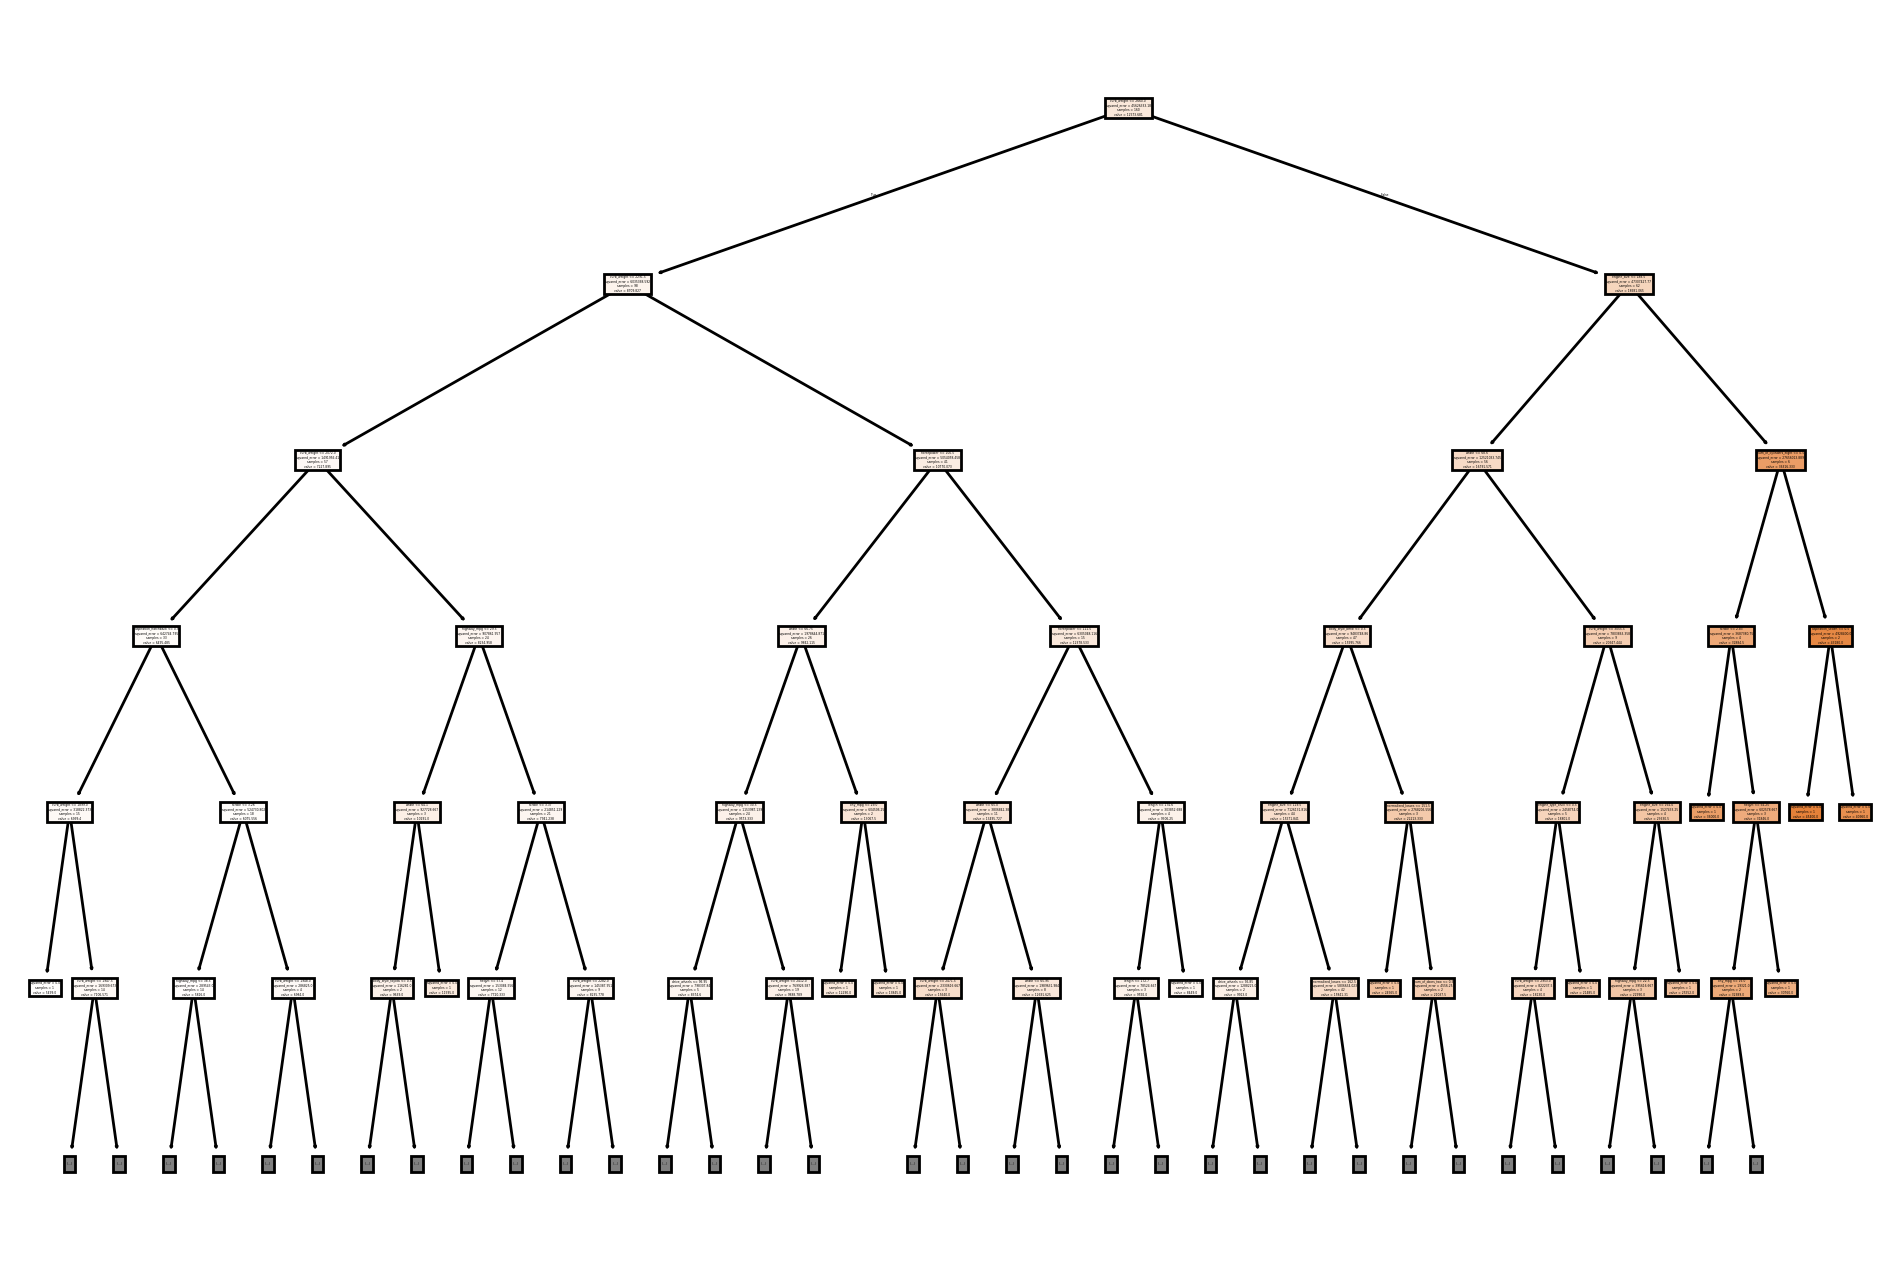

In [130]:
plt.figure(figsize=(12,8),dpi=200)
plot_tree(dtr,max_depth=5,feature_names=X.columns,filled=True);

In [131]:
# !pip install graphviz pydotplus

In [132]:
from sklearn.tree import export_graphviz
from io import StringIO
import pydotplus
from IPython.display import Image, display

In [133]:
dot_data = StringIO()

In [157]:
export_graphviz(dtr,out_file=dot_data,feature_names=X.columns,class_names=True,filled=True,rounded=True,special_characters=True)

In [161]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

list

In [162]:
graph

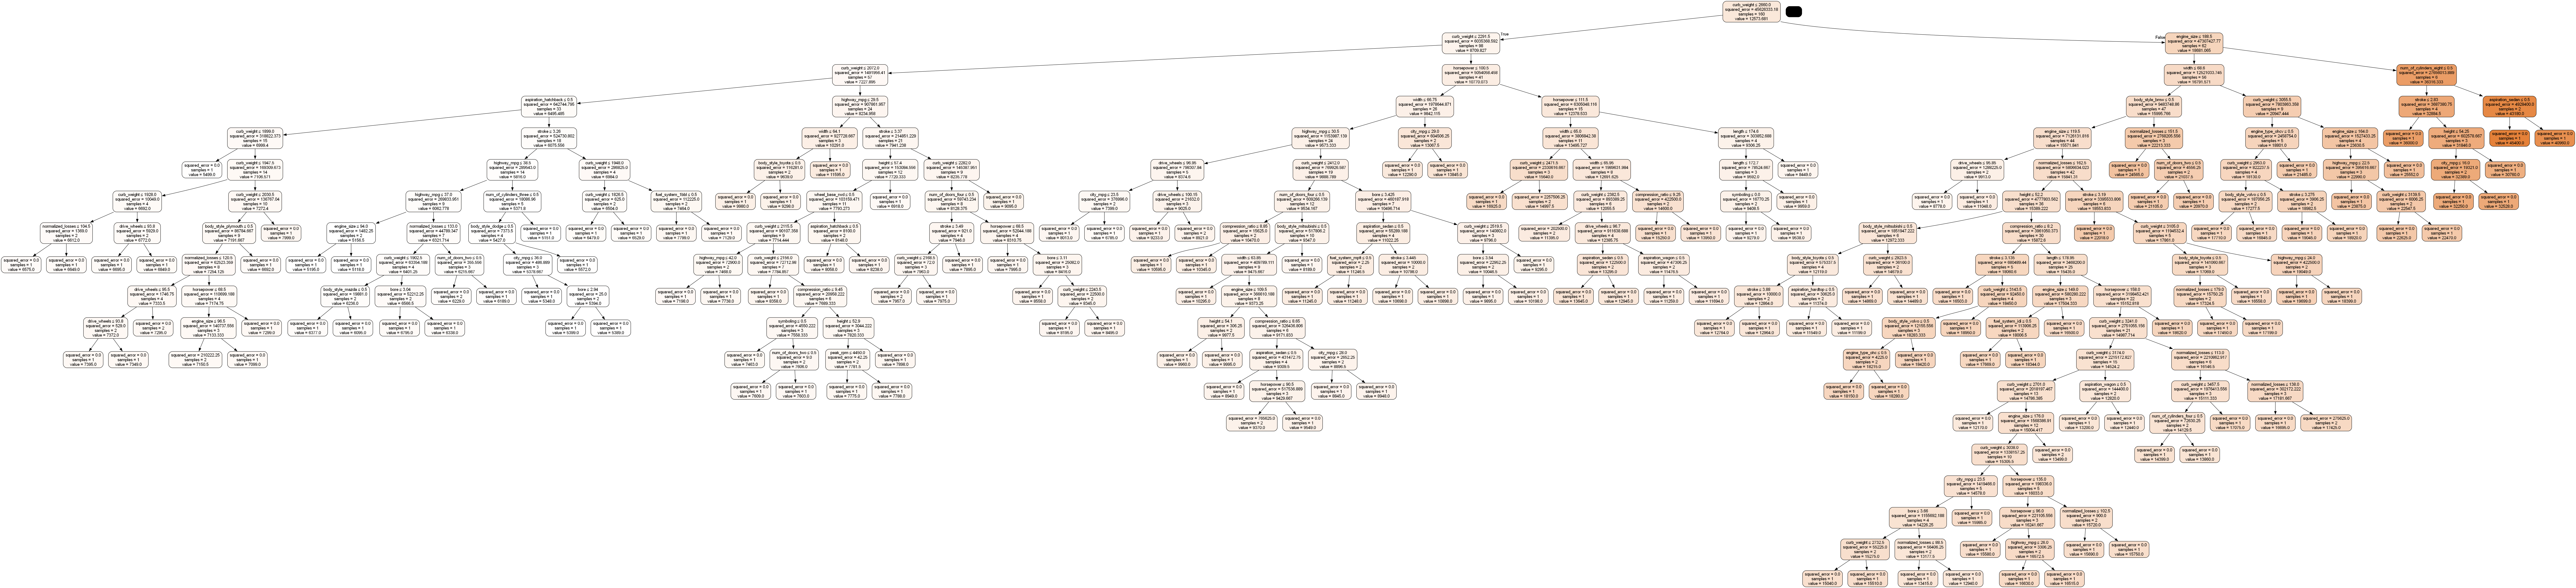

In [165]:
display(Image(graph[0].create_png()))

In [137]:
graph.write_png("decision_tree_full.png")

True

In [138]:
pr_dtr = dtr.predict(X_te)

In [139]:
mean_absolute_percentage_error(y_te,pr_dtr)

0.1218610118359788

In [140]:
root_mean_squared_error(y_te,pr_dtr)

3277.5020678678525

In [141]:
r2_score(y_te,pr_dtr)

0.912200219636214

In [143]:
params = {
    'max_depth' : [None,3,5,8,12,30],
    'min_samples_split' : [2,5,10,20],
    'min_samples_leaf' : [1,2,5,10],
    'max_features' : [None,'sqrt','log2'],
    'ccp_alpha' : [.0,.001,.01,.1]
} 

In [144]:
dtr_grid = GridSearchCV(dtr,params,cv=5,n_jobs=-1,scoring='neg_root_mean_squared_error')

In [145]:
dtr_grid.fit(X_tr,y_tr)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'ccp_alpha': [0.0, 0.001, 0.01, 0.1],
                         'max_depth': [None, 3, 5, 8, 12, 30],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 5, 10],
                         'min_samples_split': [2, 5, 10, 20]},
             scoring='neg_root_mean_squared_error')

In [146]:
dtr_grid.best_params_

{'ccp_alpha': 0.01,
 'max_depth': 30,
 'max_features': None,
 'min_samples_leaf': 1,
 'min_samples_split': 10}

In [147]:
pr_t_dtr = dtr_grid.predict(X_te)

In [148]:
mean_absolute_percentage_error(y_te,pr_t_dtr)

0.11140496410825404

In [149]:
root_mean_squared_error(y_te,pr_t_dtr)

2952.920638334042

In [150]:
r2_score(y_te,pr_t_dtr)

0.9287292988887755

In [151]:
dtr_t = DecisionTreeRegressor(ccp_alpha=0.01,max_depth=30,max_features=None,min_samples_leaf=1,min_samples_split=10)

In [152]:
dtr_t.fit(X_tr,y_tr)

DecisionTreeRegressor(ccp_alpha=0.01, max_depth=30, min_samples_split=10)

In [174]:
dtr_t.feature_importances_

array([0.00000000e+00, 7.67022177e-03, 0.00000000e+00, 2.10069756e-03,
       3.26242945e-02, 6.15320918e-03, 5.98007458e-01, 3.07729623e-01,
       0.00000000e+00, 8.07374549e-04, 4.13342373e-03, 1.62149104e-02,
       1.81226065e-03, 2.20839462e-04, 3.39162924e-03, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.02463034e-04,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00487391e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.78267215e-02, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

In [153]:
export_graphviz(dtr_t,out_file=dot_data,feature_names=X.columns,class_names=True,filled=True,rounded=True,special_characters=True)

In [156]:
graph1 = pydotplus.graph_from_dot_data(dot_data.getvalue())

In [166]:
graph1

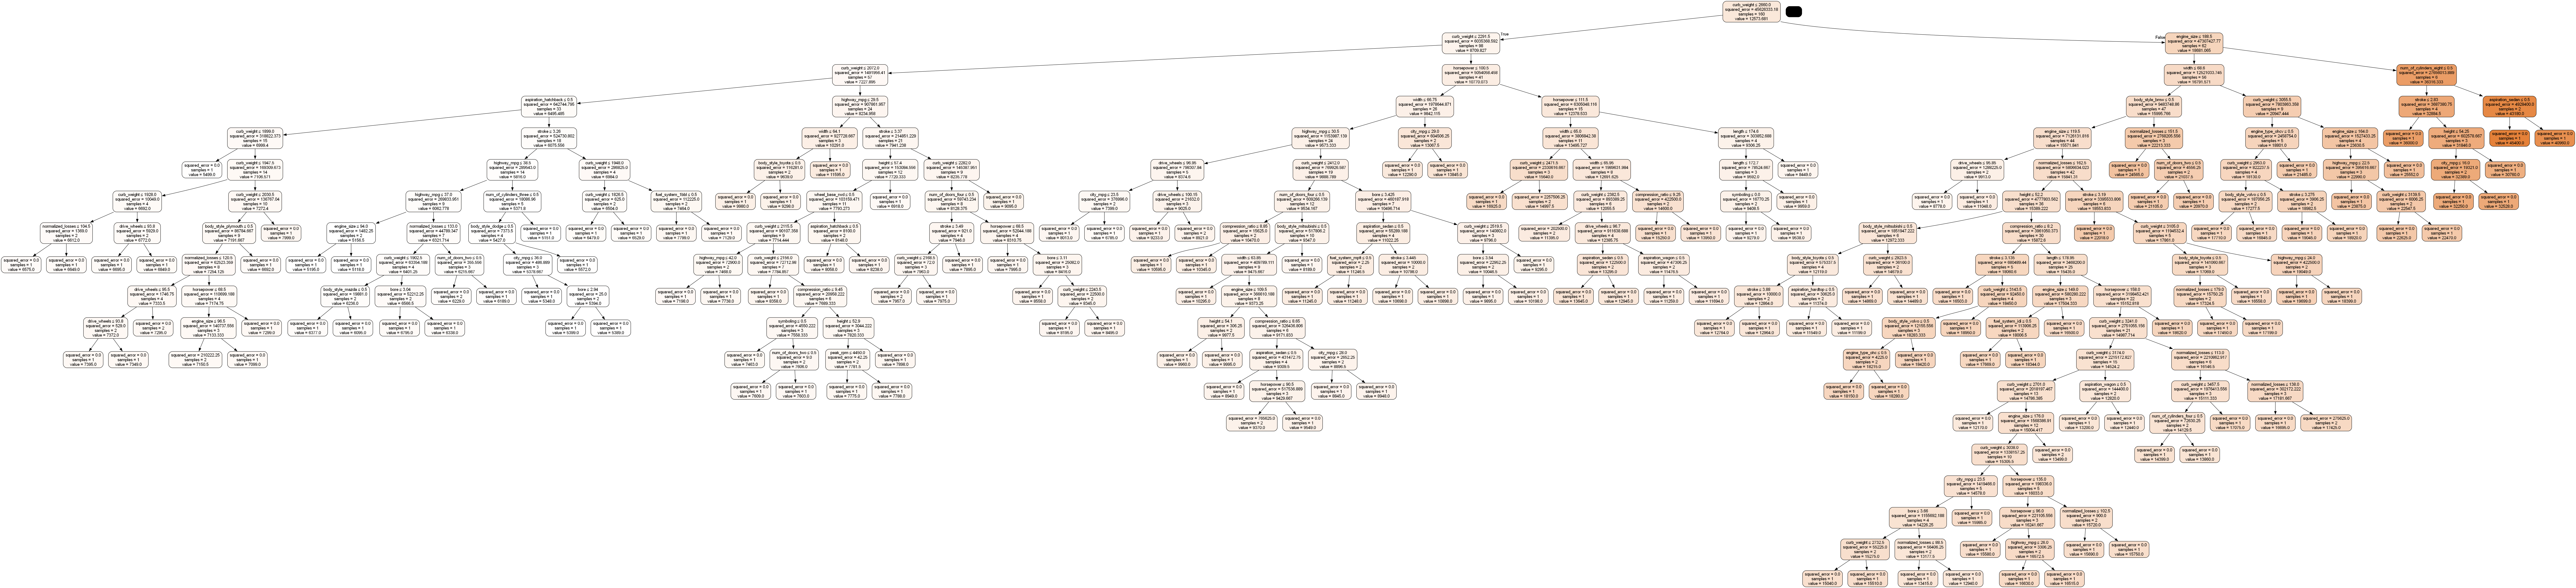

In [167]:
display(Image(graph1[0].create_png()))

In [169]:
graph1[0].write_png("decision_tree_tuned_full.png")

True

In [170]:
from sklearn.ensemble import RandomForestRegressor

In [171]:
rf = RandomForestRegressor()

In [172]:
rf.fit(X_tr,y_tr)

RandomForestRegressor()

In [173]:
rf.feature_importances_

array([1.18473797e-03, 1.05578530e-02, 2.06481540e-02, 1.50479272e-02,
       2.77356949e-02, 5.07689842e-03, 3.96891457e-01, 2.89727307e-01,
       4.90829698e-03, 3.49152720e-03, 5.60439816e-03, 4.68040378e-02,
       4.66220009e-03, 3.29592195e-02, 1.04800236e-01, 4.03566489e-04,
       1.16294674e-04, 8.36876905e-04, 7.31282067e-04, 3.12843421e-04,
       5.73485949e-04, 1.00600160e-03, 4.42150678e-04, 8.00372402e-04,
       9.23374911e-04, 3.85709522e-04, 2.25789722e-04, 8.70544036e-04,
       7.81654302e-04, 3.81686633e-06, 1.18598452e-05, 1.37225944e-04,
       8.68279957e-04, 8.16796327e-03, 4.66304222e-07, 3.71721990e-05,
       3.02803043e-05, 2.59485390e-05, 4.35269278e-05, 2.77865525e-04,
       1.50400912e-03, 2.70092512e-05, 2.05884005e-04, 8.94203229e-05,
       4.76574794e-05, 3.96987961e-05, 1.35250591e-04, 8.09233781e-05,
       2.01453713e-05, 8.18551195e-05, 7.32969807e-04, 1.24094466e-04,
       4.25290326e-05, 1.08811220e-04, 4.20242199e-05, 9.48814352e-04,
      

In [175]:
pr_rf = rf.predict(X_te)

In [176]:
mean_absolute_percentage_error(y_te,pr_rf)

0.10180211890918424

In [177]:
root_mean_squared_error(y_te,pr_rf)

2892.963851187854

In [178]:
r2_score(y_te,pr_rf)

0.9315941104664587

In [179]:
params = {'n_estimators': [100, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_leaf': [1, 2, 5],
    'max_features': ['sqrt', 'log2']}

In [180]:
rf_grid = GridSearchCV(rf,params,cv=5,n_jobs=-1,scoring='neg_root_mean_squared_error')

In [181]:
rf_grid.fit(X_tr,y_tr)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 5],
                         'n_estimators': [100, 300]},
             scoring='neg_root_mean_squared_error')

In [182]:
rf_grid.best_params_

{'max_depth': 30,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'n_estimators': 100}

In [183]:
pr_t_rf = rf_grid.predict(X_te)

In [184]:
mean_absolute_percentage_error(y_te,pr_t_rf)

0.11405568459274833

In [185]:
root_mean_squared_error(y_te,pr_t_rf)

3811.938141835947

In [186]:
r2_score(y_te,pr_t_rf)

0.8812320747735382

In [23]:
from sklearn.ensemble import GradientBoostingRegressor

In [24]:
gbr = GradientBoostingRegressor()

In [189]:
gbr.fit(X_tr,y_tr)

GradientBoostingRegressor()

In [190]:
gbr.feature_importances_

array([6.24637170e-04, 2.93255724e-03, 1.96069154e-02, 2.37278009e-02,
       4.36814091e-02, 2.99567235e-03, 4.12984114e-01, 2.70220207e-01,
       2.74923898e-03, 7.57113836e-03, 4.61909014e-03, 8.14140289e-02,
       8.20645426e-03, 2.72486153e-02, 5.91414724e-02, 0.00000000e+00,
       0.00000000e+00, 2.72540341e-04, 2.13554571e-04, 8.43577852e-06,
       0.00000000e+00, 5.58826638e-03, 4.75783078e-04, 1.93613044e-04,
       4.10153158e-04, 8.20062894e-06, 0.00000000e+00, 4.74794765e-05,
       8.61607372e-06, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       4.70578785e-05, 1.01093508e-02, 0.00000000e+00, 0.00000000e+00,
       4.12448660e-05, 3.25779807e-05, 0.00000000e+00, 9.76802089e-05,
       5.91093638e-03, 2.17389284e-04, 2.87725722e-04, 2.01872693e-09,
       0.00000000e+00, 3.46042904e-05, 5.84340145e-04, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 5.11714263e-04, 2.82826928e-07,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.77723570e-05,
      

In [191]:
pr_gbr = gbr.predict(X_te)

In [192]:
mean_absolute_percentage_error(y_te,pr_gbr)

0.09039508001615221

In [193]:
root_mean_squared_error(y_te,pr_gbr)

2393.7330814506736

In [194]:
r2_score(y_te,pr_gbr)

0.9531662509696214

In [25]:
params = {
    'n_estimators': [100, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [2, 3, 4],
    'subsample': [0.7, 0.9, 1.0]
}

In [26]:
gbr_grid = GridSearchCV(gbr,params,cv=5,n_jobs=-1,scoring='neg_root_mean_squared_error')

In [27]:
gbr_grid.fit(X_tr,y_tr)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [2, 3, 4], 'n_estimators': [100, 300],
                         'subsample': [0.7, 0.9, 1.0]},
             scoring='neg_root_mean_squared_error')

In [28]:
gbr_grid.best_params_

{'learning_rate': 0.05, 'max_depth': 2, 'n_estimators': 100, 'subsample': 0.7}

In [29]:
pr_t_gbr = gbr_grid.predict(X_te)

In [30]:
mean_absolute_percentage_error(y_te,pr_t_gbr)

0.1126098234641007

In [31]:
root_mean_squared_error(y_te,pr_t_gbr)

2814.656693423426

In [32]:
r2_score(y_te,pr_t_gbr)

0.9352472312736931

In [203]:
from sklearn.ensemble import ExtraTreesRegressor

In [204]:
etr = ExtraTreesRegressor()

In [205]:
etr.fit(X_tr,y_tr)

ExtraTreesRegressor()

In [207]:
etr.feature_importances_

array([1.83060589e-03, 2.58354406e-03, 1.48737822e-02, 2.09330891e-02,
       4.37122586e-02, 6.06930822e-03, 1.70299146e-01, 2.34971511e-01,
       8.96906601e-03, 2.77388546e-03, 2.27567666e-03, 9.50914076e-02,
       8.78296757e-03, 7.73318208e-02, 7.28307403e-02, 3.79482458e-04,
       2.36859604e-04, 5.78196938e-03, 5.50707407e-03, 9.99402414e-04,
       9.10325123e-04, 2.87850103e-03, 5.99005765e-03, 4.90858000e-03,
       3.01281506e-03, 5.66760841e-04, 3.12643823e-04, 2.22102803e-03,
       1.02134620e-01, 2.41806283e-03, 2.53158029e-03, 2.94342061e-04,
       1.84768102e-03, 1.00026387e-02, 3.24382035e-06, 1.00580247e-04,
       2.92052462e-04, 7.57934266e-04, 2.56612566e-03, 1.26562683e-03,
       3.16742494e-03, 1.15974998e-04, 2.15461670e-04, 6.75328228e-04,
       1.30900718e-03, 1.01538743e-04, 4.04604613e-03, 4.64302426e-04,
       5.54184704e-04, 2.29686291e-04, 2.32170852e-03, 8.80666139e-04,
       8.57269330e-04, 7.59037102e-04, 3.01251571e-04, 4.20676713e-03,
      

In [208]:
pr_etr = etr.predict(X_te)

In [209]:
mean_absolute_percentage_error(y_te,pr_etr)

0.09205778561213013

In [210]:
root_mean_squared_error(y_te,pr_etr)

2586.651779487807

In [211]:
r2_score(y_te,pr_etr)

0.9453130862404893

In [217]:
params = {
    'n_estimators': [200, 400, 600],
    'max_depth': [None, 10, 20, 30],
    'min_samples_leaf': [1, 2, 5, 10],
    'max_features': ['sqrt', 'log2']
} 

In [218]:
etr_grid = GridSearchCV(etr,param_grid=params,cv=5,n_jobs=-1,scoring='neg_root_mean_squared_error')

In [219]:
etr_grid.fit(X_tr,y_tr)

GridSearchCV(cv=5, estimator=ExtraTreesRegressor(), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 5, 10],
                         'n_estimators': [200, 400, 600]},
             scoring='neg_root_mean_squared_error')

In [220]:
etr_grid.best_params_

{'max_depth': 30,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'n_estimators': 200}

In [221]:
pr_t_etr = etr_grid.predict(X_te)

In [222]:
mean_absolute_percentage_error(y_te,pr_t_etr)

0.10206814042320597

In [223]:
root_mean_squared_error(y_te,pr_t_etr)

2812.123272204381

In [224]:
r2_score(y_te,pr_t_etr)

0.9353637443896556

In [225]:
def evaluate(y_true, y_pred):
    return {
        "RMSE": root_mean_squared_error(y_true, y_pred),
        "MAPE": mean_absolute_percentage_error(y_true, y_pred),
        "R2": r2_score(y_true, y_pred)
    }


In [228]:
model_predictions = {
    # Linear Models
    "Linear Regression": pr_linear,

    "Ridge Regression": pr_ridge,
    "Tuned Ridge Regression": pr_t_ridge,

    "Lasso Regression": pr_lasso,
    "Tuned Lasso Regression": pr_t_lasso,

    "ElasticNet Regression": pr_elastic,
    "Tuned ElasticNet Regression": pr_t_elastic,

    # KNN
    "KNN Regressor": pr_knn,
    "Tuned KNN Regressor": pr_t_knn,

    # SVR
    "Linear SVR": pr_lsvr,

    "Kerneled_SVR": pr_svr,
    "Tuned SVR": pr_t_svr,

    # Tree-based
    "Decision Tree Regressor": pr_dtr,
    "Tuned Decision Tree Regressor": pr_t_dtr,

    "Random Forest Regressor": pr_rf,
    "Tuned Random Forest Regressor": pr_t_rf,

    "Extra Trees Regressor": pr_etr,
    "Tuned Extra Trees Regressor": pr_t_etr,

    "Gradient Boosting Regressor": pr_gbr,
    "Tuned Gradient Boosting Regressor": pr_t_gbr
}


In [229]:
results = []

for model_name, preds in model_predictions.items():
    metrics = evaluate(y_te, preds)
    metrics["Model"] = model_name
    results.append(metrics)

results_df = pd.DataFrame(results)


In [230]:
results_df

RMSE      MAPE        R2                              Model
0    3274.624729  0.113511  0.912354                  Linear Regression
1    3304.513891  0.114977  0.910747                   Ridge Regression
2    3334.296044  0.120859  0.909131             Tuned Ridge Regression
3    3294.695317  0.113680  0.911277                   Lasso Regression
4    3430.486504  0.130609  0.903812             Tuned Lasso Regression
5    3684.456944  0.130825  0.889043              ElasticNet Regression
6    3339.960599  0.121949  0.908822        Tuned ElasticNet Regression
7    6841.655455  0.192882  0.617413                      KNN Regressor
8    3652.912750  0.134376  0.890935                Tuned KNN Regressor
9   19057.542318  0.985142 -1.968529                         Linear SVR
10  12216.114584  0.411656 -0.219758                       Kerneled_SVR
11   3577.083915  0.116120  0.895416                          Tuned SVR
12   3277.502068  0.121861  0.912200            Decision Tree Regressor
13   2952.920638  0.111405  0.928729      Tuned Decision Tree Regressor
14   2892.963851  0.101802  0.931594            Random Forest Regressor
15   3811.938142  0.114056  0.881232      Tuned Random Forest Regressor
16   2586.651779  0.092058  0.945313              Extra Trees Regressor
17   2812.123272  0.102068  0.935364        Tuned Extra Trees Regressor
18   2393.733081  0.090395  0.953166        Gradient Boosting Regressor
19   2176.833956  0.096522  0.961269  Tuned Gradient Boosting Regressor

In [234]:
col = results_df.pop('Model')

In [235]:
results_df.insert(0,'Model',col)

In [236]:
results_df

Model          RMSE      MAPE        R2
0                   Linear Regression   3274.624729  0.113511  0.912354
1                    Ridge Regression   3304.513891  0.114977  0.910747
2              Tuned Ridge Regression   3334.296044  0.120859  0.909131
3                    Lasso Regression   3294.695317  0.113680  0.911277
4              Tuned Lasso Regression   3430.486504  0.130609  0.903812
5               ElasticNet Regression   3684.456944  0.130825  0.889043
6         Tuned ElasticNet Regression   3339.960599  0.121949  0.908822
7                       KNN Regressor   6841.655455  0.192882  0.617413
8                 Tuned KNN Regressor   3652.912750  0.134376  0.890935
9                          Linear SVR  19057.542318  0.985142 -1.968529
10                       Kerneled_SVR  12216.114584  0.411656 -0.219758
11                          Tuned SVR   3577.083915  0.116120  0.895416
12            Decision Tree Regressor   3277.502068  0.121861  0.912200
13      Tuned Decision Tree Regressor   2952.920638  0.111405  0.928729
14            Random Forest Regressor   2892.963851  0.101802  0.931594
15      Tuned Random Forest Regressor   3811.938142  0.114056  0.881232
16              Extra Trees Regressor   2586.651779  0.092058  0.945313
17        Tuned Extra Trees Regressor   2812.123272  0.102068  0.935364
18        Gradient Boosting Regressor   2393.733081  0.090395  0.953166
19  Tuned Gradient Boosting Regressor   2176.833956  0.096522  0.961269

In [237]:
results_df = results_df.sort_values(by=['RMSE','MAPE'], ascending=[True,True])

In [238]:
results_df

Model          RMSE      MAPE        R2
19  Tuned Gradient Boosting Regressor   2176.833956  0.096522  0.961269
18        Gradient Boosting Regressor   2393.733081  0.090395  0.953166
16              Extra Trees Regressor   2586.651779  0.092058  0.945313
17        Tuned Extra Trees Regressor   2812.123272  0.102068  0.935364
14            Random Forest Regressor   2892.963851  0.101802  0.931594
13      Tuned Decision Tree Regressor   2952.920638  0.111405  0.928729
0                   Linear Regression   3274.624729  0.113511  0.912354
12            Decision Tree Regressor   3277.502068  0.121861  0.912200
3                    Lasso Regression   3294.695317  0.113680  0.911277
1                    Ridge Regression   3304.513891  0.114977  0.910747
2              Tuned Ridge Regression   3334.296044  0.120859  0.909131
6         Tuned ElasticNet Regression   3339.960599  0.121949  0.908822
4              Tuned Lasso Regression   3430.486504  0.130609  0.903812
11                          Tuned SVR   3577.083915  0.116120  0.895416
8                 Tuned KNN Regressor   3652.912750  0.134376  0.890935
5               ElasticNet Regression   3684.456944  0.130825  0.889043
15      Tuned Random Forest Regressor   3811.938142  0.114056  0.881232
7                       KNN Regressor   6841.655455  0.192882  0.617413
10                       Kerneled_SVR  12216.114584  0.411656 -0.219758
9                          Linear SVR  19057.542318  0.985142 -1.968529

In [239]:
results_df.to_csv("Performance_Metrics.csv")

In [33]:
gbr_grid.best_params_

{'learning_rate': 0.05, 'max_depth': 2, 'n_estimators': 100, 'subsample': 0.7}

In [34]:
final_model = GradientBoostingRegressor(learning_rate=0.1,max_depth=2,n_estimators=300,subsample=0.7)

In [35]:
final_model.fit(X_tr,y_tr)

GradientBoostingRegressor(max_depth=2, n_estimators=300, subsample=0.7)

In [36]:
import joblib

In [244]:
joblib.dump(final_model,'final_model.pkl')

['final_model.pkl']

In [10]:
X.columns

Index(['symboling', 'normalized_losses', 'drive_wheels', 'length', 'width',
       'height', 'curb_weight', 'engine_size', 'bore', 'stroke',
       'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg',
       'highway_mpg', 'Fuel_type_diesel', 'Fuel_type_gas', 'make_std',
       'make_turbo', 'num_of_doors_four', 'num_of_doors_two',
       'aspiration_convertible', 'aspiration_hardtop', 'aspiration_hatchback',
       'aspiration_sedan', 'aspiration_wagon', 'wheel_base_4wd',
       'wheel_base_fwd', 'wheel_base_rwd', 'engine_location_front',
       'engine_location_rear', 'body_style_alfa-romero', 'body_style_audi',
       'body_style_bmw', 'body_style_chevrolet', 'body_style_dodge',
       'body_style_honda', 'body_style_isuzu', 'body_style_jaguar',
       'body_style_mazda', 'body_style_mercedes-benz', 'body_style_mercury',
       'body_style_mitsubishi', 'body_style_nissan', 'body_style_peugot',
       'body_style_plymouth', 'body_style_porsche', 'body_style_renault',
       'bo

In [37]:
joblib.dump(list(X.columns),'encoded_column_names.pkl')

['encoded_column_names.pkl']

In [247]:
df_original.columns

Index(['symboling', 'normalized_losses', 'Fuel_type', 'make', 'num_of_doors',
       'aspiration', 'wheel_base', 'engine_location', 'drive_wheels',
       'body_style', 'length', 'width', 'height', 'curb_weight', 'engine_type',
       'num_of_cylinders', 'engine_size', 'fuel_system', 'bore', 'stroke',
       'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg',
       'highway_mpg', 'price'],
      dtype='object')

In [38]:
joblib.dump(list(df_original.columns),'original_column_names.pkl')

['original_column_names.pkl']

In [39]:
df_original.columns

Index(['symboling', 'normalized_losses', 'Fuel_type', 'make', 'num_of_doors',
       'aspiration', 'wheel_base', 'engine_location', 'drive_wheels',
       'body_style', 'length', 'width', 'height', 'curb_weight', 'engine_type',
       'num_of_cylinders', 'engine_size', 'fuel_system', 'bore', 'stroke',
       'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg',
       'highway_mpg', 'price'],
      dtype='object')

In [40]:
X_Original = df_original.drop('price',axis=1)

In [41]:
Y_Original = df_original['price']

In [42]:
df_cat = df_original.select_dtypes(include="O")

In [43]:
df_cat.columns

Index(['Fuel_type', 'make', 'num_of_doors', 'aspiration', 'wheel_base',
       'engine_location', 'body_style', 'engine_type', 'num_of_cylinders',
       'fuel_system'],
      dtype='object')

In [44]:
categorical_info = {
    'Fuel_type' : df_cat['Fuel_type'].unique().tolist(),
    'make' : df_cat['make'].unique().tolist(),
    'num_of_doors' : df_cat['num_of_doors'].unique().tolist(),
    'aspiration' : df_cat['aspiration'].unique().tolist(),
    'wheel_base' : df_cat['wheel_base'].unique().tolist(),
    'engine_location' : df_cat['engine_location'].unique().tolist(),
    'body_style' : df_cat['body_style'].unique().tolist(),
    'engine_type' : df_cat['engine_type'].unique().tolist(),
    'num_of_cylinders' : df_cat['num_of_cylinders'].unique().tolist(),
    'fuel_system' : df_cat['fuel_system'].unique().tolist(),
}

In [45]:
categorical_info

{'Fuel_type': ['gas', 'diesel'],
 'make': ['std', 'turbo'],
 'num_of_doors': ['two', 'four'],
 'aspiration': ['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
 'wheel_base': ['rwd', 'fwd', '4wd'],
 'engine_location': ['front', 'rear'],
 'body_style': ['alfa-romero',
  'audi',
  'bmw',
  'chevrolet',
  'dodge',
  'honda',
  'isuzu',
  'jaguar',
  'mazda',
  'mercedes-benz',
  'mercury',
  'mitsubishi',
  'nissan',
  'peugot',
  'plymouth',
  'porsche',
  'renault',
  'saab',
  'subaru',
  'toyota',
  'volkswagen',
  'volvo'],
 'engine_type': ['dohc', 'ohcv', 'ohc', 'l', 'rotor', 'ohcf'],
 'num_of_cylinders': ['four',
  'six',
  'five',
  'three',
  'twelve',
  'two',
  'eight'],
 'fuel_system': ['mpfi', '2bbl', 'mfi', '1bbl', 'spfi', '4bbl', 'idi', 'spdi']}

In [46]:
df_num = X_Original.select_dtypes(exclude='O')

In [47]:
df_num.columns

Index(['symboling', 'normalized_losses', 'drive_wheels', 'length', 'width',
       'height', 'curb_weight', 'engine_size', 'bore', 'stroke',
       'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg',
       'highway_mpg'],
      dtype='object')

In [11]:
df_original.head()

symboling  normalized_losses Fuel_type make num_of_doors   aspiration  \
0          3              115.0       gas  std          two  convertible   
1          3              115.0       gas  std          two  convertible   
2          1              115.0       gas  std          two    hatchback   
3          2              164.0       gas  std         four        sedan   
4          2              164.0       gas  std         four        sedan   

  wheel_base engine_location  drive_wheels   body_style  ...  engine_size  \
0        rwd           front          88.6  alfa-romero  ...          130   
1        rwd           front          88.6  alfa-romero  ...          130   
2        rwd           front          94.5  alfa-romero  ...          152   
3        fwd           front          99.8         audi  ...          109   
4        4wd           front          99.4         audi  ...          136   

   fuel_system  bore  stroke compression_ratio horsepower  peak_rpm city_mpg  \
0         mpfi  3.47    2.68               9.0      111.0    5000.0       21   
1         mpfi  3.47    2.68               9.0      111.0    5000.0       21   
2         mpfi  2.68    3.47               9.0      154.0    5000.0       19   
3         mpfi  3.19    3.40              10.0      102.0    5500.0       24   
4         mpfi  3.19    3.40               8.0      115.0    5500.0       18   

   highway_mpg  price  
0           27  13495  
1           27  16500  
2           26  16500  
3           30  13950  
4           22  17450  

[5 rows x 26 columns]